# Mount google drive
get access to data files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# drive.flush_and_unmount()

Mounted at /content/drive


# Import pandas, numpy, plotly, regex, matplotlib, seaborn

In [ ]:
import pandas as pd
import numpy as np
import re

### Load data, read.csv()

In [ ]:
df_countries = pd.read_csv("/content/drive/MyDrive/final_project/data/list_countries.csv", encoding='latin-1')
df_state_short_names = pd.read_csv("/content/drive/MyDrive/final_project/data/state_short_names.csv")

In [ ]:
df_simplyhired = pd.read_csv("/content/drive/MyDrive/final_project/data/simplyhired.csv")
df_merged = df_simplyhired.copy()

In [ ]:
#drop unnamed column
df_merged = df_merged.drop(['Unnamed: 0'], axis = 1)
df_merged.reset_index(inplace=True, drop=True)
df_merged.index

RangeIndex(start=0, stop=3288, step=1)

In [ ]:
#df_merged.isna().value_counts()

In [ ]:
#df_merged['salary'].value_counts(dropna=False, normalize=True)

In [ ]:
df_merged.dropna(inplace=True) 

In [ ]:
#df_merged['salary'].value_counts(dropna=False, normalize=True)

In [ ]:
df_merged['title'] = df_merged['title'].str.lower()
df_merged['salary'] = df_merged['salary'].str.lower()
df_merged['location'] = df_merged['location'].str.lower()
df_merged['description'] = df_merged['description'].str.lower()
df_merged['company'] = df_merged['company'].str.lower()

In [ ]:
state_short_name_list = df_state_short_names['short_name'].str.lower()

state_long_name_list = df_state_short_names['state_name'].str.lower()

country_short_name_list = df_countries['country'].str.lower()

country_long_name_list = df_countries['name'].str.lower()

In [ ]:
df_merged.head()

,company,description,location,salary,title
0,aci federal™,5+ years data science analyst experience. crea...,"falls church, va",$39.38 an hour,data science analyst
2,"forward air, inc.",present information using data visualization t...,"forest park, ga +1 location","$85,000 - $120,000 a year",data scientist
3,permanent general assurance corp.,"as an associate data scientist, you will be in...","nashville, tn","$76,440 a year",associate data scientist
4,nova collective,working with raw survey data to produce clean ...,"chicago, il",$30 - $35 an hour,data analyst
6,quality built,support the design of end-to-end data visualiz...,"denver, co +4 locations","$65,000 - $80,000 a year",reporting and data science analyst


# Salary

## 1_Cleaning data

In [ ]:
df_merged['salary'] = df_merged['salary'].str.replace(',', '')

### REGEX reset

## 1_Cleaning data
regex, regular expressions

In [ ]:
regex_results_1 = df_merged['salary'].str.extract(r'(?P<sal_1>\$\d\w+)', expand=True)

regex_results_2 = df_merged['salary'].str.extract(r'(?P<sal_1>\$\d\w+\W-\s\$\d\w+\s)', expand=True)

## 1_Cleaning data
Remove "$"-sign

In [ ]:
# single number salary
regex_results_1['sal_1'] = regex_results_1['sal_1'].str.replace("$","").str.lstrip()
# range of min-max salary
regex_results_2['sal_1'] = regex_results_2['sal_1'].str.replace("$","").str.lstrip()

## 1_Cleaning data
Split using separator "-"

In [ ]:
regex_results_3 = regex_results_2['sal_1'].str.split("-", n = 1, expand = True)

Remove "$"-sign

In [ ]:
regex_results_3['sal_min'] = regex_results_3[0].str.replace("$","").str.lstrip()
regex_results_3['sal_max'] = regex_results_3[1].str.replace("$","").str.lstrip()

Add back split min_max values to source df

In [ ]:
regex_results_2['sal_min'] = regex_results_3['sal_min']
regex_results_2['sal_max'] = regex_results_3['sal_max']

## 1_Cleaning data
Drop column containing redundant information 

In [ ]:
regex_results_2.drop('sal_1', axis=1, inplace=True)

## 1_Cleaning data
Replace NaN with 0 to enable error-free aritmetic operations

In [ ]:
regex_results_2.fillna(0, inplace=True)

In [ ]:
regex_results_2['sal_min'] = regex_results_2['sal_min'].astype(int)
regex_results_2['sal_max'] = regex_results_2['sal_max'].astype(int)

## 1_Cleaning data
Consolidate Salary data. 
1.   if only 1 number available use it as min and max. 
2.   if range available then use separate min and max.
3.   convert data types to appropriate ones






In [ ]:
# convert data types
regex_results_1['sal_1'] = regex_results_1['sal_1'].astype(float)
# fill na with 0
regex_results_1.fillna(0, inplace=True)
# convert data types
regex_results_1['sal_1'] = regex_results_1['sal_1'].astype(int)
# consolidate data
regex_results_2['sal_1'] = regex_results_1['sal_1']

In [ ]:
# if only 1 number available use it as min and max. 
regex_results_2.loc[regex_results_2['sal_min'] ==0,'sal_min'] = regex_results_2['sal_1']
regex_results_2.loc[regex_results_2['sal_max'] ==0,'sal_max'] = regex_results_2['sal_1']
regex_results_2.drop('sal_1', axis=1, inplace=True)

In [ ]:
# if only 1 number available use it as min and max. 
df_merged['sal_max'] = regex_results_2['sal_max']
df_merged['sal_min'] = regex_results_2['sal_min']

## 1_Cleaning data
Update salary monthly multiplier

In [ ]:
%%capture
regex_results_4 = pd.DataFrame( df_merged['salary'].str.contains('month') )
#regex_results_4
salary_is_monthly_list = regex_results_4.index[regex_results_4['salary'] == True].tolist()
#print(salary_is_monthly_list)
#print(len(salary_is_monthly_list))
#df_merged.iloc[salary_is_monthly_list,]
df_merged['monthly_multiplier'] = 0
df_merged['monthly_multiplier'].loc[salary_is_monthly_list,] = 12
#df_merged['monthly_multiplier'].value_counts()

## 1_Cleaning data
Update salary hourly multiplier

In [ ]:
%%capture
regex_results_5 = pd.DataFrame( df_merged['salary'].str.contains('hour') )
#regex_results_5
salary_is_hourly_list = regex_results_5.index[regex_results_5['salary'] == True].tolist()
#print(salary_is_hourly_list)
#print(len(salary_is_hourly_list))
#df_merged.iloc[salary_is_hourly_list,]
df_merged['hourly_multiplier'] = 0
df_merged['hourly_multiplier'].loc[salary_is_hourly_list,] = 2000
#df_merged['hourly_multiplier'].value_counts()

## 1_Cleaning data
Update salary yearly multiplier

In [ ]:
%%capture
regex_results_6 = pd.DataFrame( df_merged['salary'].str.contains('year') )
#regex_results_6
salary_is_yearly_list = regex_results_6.index[regex_results_6['salary'] == True].tolist()
#print(salary_is_yearly_list)
#print(len(salary_is_yearly_list))
#df_merged.iloc[salary_is_yearly_list,]
df_merged['yearly_multiplier'] = 0
df_merged['yearly_multiplier'].loc[salary_is_yearly_list,] = 1
#df_merged['yearly_multiplier'].value_counts()

In [ ]:
df_merged['sal_global_multiplier'] = df_merged['hourly_multiplier'] + df_merged['monthly_multiplier'] + df_merged['yearly_multiplier']

In [ ]:
df_merged['sal_max_yearly'] = df_merged['sal_max'] * df_merged['sal_global_multiplier']
df_merged['sal_min_yearly'] = df_merged['sal_min'] * df_merged['sal_global_multiplier']

In [ ]:
#df_merged['sal_max_yearly'].value_counts(dropna=False, normalize=True)

In [ ]:
#df_merged['sal_min_yearly'].value_counts(dropna=False, normalize=True)

In [ ]:
df_merged.columns

Index(['company', 'description', 'location', 'salary', 'title', 'sal_max',
       'sal_min', 'monthly_multiplier', 'hourly_multiplier',
       'yearly_multiplier', 'sal_global_multiplier', 'sal_max_yearly',
       'sal_min_yearly'],
      dtype='object')

In [ ]:
df_merged = df_merged[['title','company','location', 'description','sal_min_yearly','sal_max_yearly']]
#df_merged.head()

# Location Column

## Reset location

In [ ]:
df_location = df_merged['location']

In [ ]:
%%capture
remove_this = re.compile(r'\w+,[[:space:]]\w+')
regex_results_new = df_location.str.replace(remove_this, "")

RESET split_location

In [ ]:
%%capture
split_location = regex_results_new.str.split(",", n = 2, expand = True)
split_location.columns = ["city","state_short"]
split_location['city'] = split_location['city'].str.strip().str.lower()
split_location['state_short'] = split_location['state_short'].str.strip().str.lower()
# fillna
split_location.fillna(axis=0, inplace=True,value="unknown", method=None)
split_location.reset_index(inplace=True, drop=True)

In [ ]:
for index_1 in range(0, len(split_location)):
  split_location.loc[index_1,'len_state_short'] = len(split_location['state_short'][index_1])

Extract state short name

In [ ]:
# %%capture
split_location['len_state_short'] = 0
split_location['state_short_clean'] = "xx"

for index_1 in range(0, len(split_location)):
  if (split_location['len_state_short'][index_1] < 3):
    split_location.loc[index_1,'state_short_clean']  = split_location.loc[index_1,'state_short'][0:2]

  #if (split_location.loc[index_1,'state_short'] == "unknown"):
    #split_location.loc[index_1,'state_short_clean'] = "xx"
  #if split_location['state_short']
  #print(index_1,"=index ",",,item=", split_location['state_short'][index_1])

In [ ]:
len(split_location)

898

In [ ]:
len(df_merged)

898

In [ ]:
df_merged.reset_index(inplace=True, drop=True)

In [ ]:
df_merged['state_short_clean'] = split_location['state_short_clean']
df_merged['city_clean'] = split_location['city']
df_merged = df_merged.drop('location', axis=1)
df_merged.reset_index(inplace=True, drop=True)
df_merged

,title,company,description,sal_min_yearly,sal_max_yearly,state_short_clean,city_clean
0,data science analyst,aci federal™,5+ years data science analyst experience. crea...,78000,78000,va,falls church
1,data scientist,"forward air, inc.",present information using data visualization t...,85000,120000,ga,forest park
2,associate data scientist,permanent general assurance corp.,"as an associate data scientist, you will be in...",76440,76440,tn,nashville
3,data analyst,nova collective,working with raw survey data to produce clean ...,60000,70000,il,chicago
4,reporting and data science analyst,quality built,support the design of end-to-end data visualiz...,65000,80000,co,denver
...,...,...,...,...,...,...,...
893,senior statistical programmer (sr. associate),pfizer,working knowledge of clinical data and relevan...,70700,117900,pa,collegeville
894,healthcare analyst/statistical programmer,institute for accountable care,experience working with health care claims dat...,90000,130000,un,remote
895,research assistant/data analyst,institute of neuro innovation,"education: undergraduate (minimum), graduate (...",52000,100000,ca,santa monica
896,senior statistical programmer (sr. associate),pfizer,working knowledge of clinical data and relevan...,70700,117900,pa,collegeville


In [ ]:
split_location['city'].value_counts()

remote          282
santa monica    209
collegeville    209
washington       21
new york         12
               ... 
sunnyvale         1
dearborn          1
san jose          1
matthews          1
worthington       1
Name: city, Length: 112, dtype: int64

# RESET df_merged

In [ ]:
df_clean_location_salary = df_merged.copy()

In [ ]:
df_merged = df_clean_location_salary

In [ ]:
df_merged['title']

0                               data science analyst
1                                     data scientist
2                           associate data scientist
3                                       data analyst
4                 reporting and data science analyst
                           ...                      
893    senior statistical programmer (sr. associate)
894        healthcare analyst/statistical programmer
895                  research assistant/data analyst
896    senior statistical programmer (sr. associate)
897        healthcare analyst/statistical programmer
Name: title, Length: 898, dtype: object

# Title column cleanup

## reformat to known categories

In [ ]:
df_merged['has_science'] = np.where ( df_merged['title'].str.find("science") > -1, 1,0 )
df_merged['has_scientist'] = np.where ( df_merged['title'].str.find("scientist") > -1, 1,0 )
df_merged['has_analyst'] = np.where ( df_merged['title'].str.find("analyst") > -1, 1,0 )
df_merged['has_engineer'] = np.where ( df_merged['title'].str.find("engineer") > -1, 1,0 )

df_merged['has_senior'] = np.where ( df_merged['title'].str.find("senior") > -1, 1,0 )
df_merged['has_director'] = np.where ( df_merged['title'].str.find("director") > -1, 1,0 )
df_merged['has_analytics'] = np.where ( df_merged['title'].str.find("analytics") > -1, 1,0 )

df_merged['has_data_science'] = np.where ( df_merged['title'].str.find("data science") > -1, 1,0 )
df_merged['has_data_scientist'] = np.where ( df_merged['title'].str.find("data scientist") > -1, 1,0 )
df_merged['has_data_analyst'] = np.where ( df_merged['title'].str.find("data analyst") > -1, 1,0 )
df_merged['has_data_engineer'] = np.where ( df_merged['title'].str.find("data engineer") > -1, 1,0 )

In [ ]:
#1-data scientist
#2-data analyst
#3-data engineer
df_merged['title_clean'] = np.select(condlist=[df_merged['title'].str.find("data scientist") > -1,
                                            df_merged['title'].str.find("data analyst") > -1,
                                            df_merged['title'].str.find("data engineer") > -1,
                                           ],
                                  choicelist=["data_scientist","data_analyst","data_engineer"], 
                                  default=0)

In [ ]:
df_merged['title_clean'].value_counts(normalize=True)

0                 0.618040
data_analyst      0.275056
data_scientist    0.084633
data_engineer     0.022272
Name: title_clean, dtype: float64

In [ ]:
df_merged = df_merged.drop('title', axis=1)
df_merged = df_merged.dropna()
df_merged.reset_index(inplace=True, drop=True)
df_merged

,company,description,sal_min_yearly,sal_max_yearly,state_short_clean,city_clean,has_science,has_scientist,has_analyst,has_engineer,has_senior,has_director,has_analytics,has_data_science,has_data_scientist,has_data_analyst,has_data_engineer,title_clean
0,aci federal™,5+ years data science analyst experience. crea...,78000,78000,va,falls church,1,0,1,0,0,0,0,1,0,0,0,0
1,"forward air, inc.",present information using data visualization t...,85000,120000,ga,forest park,0,1,0,0,0,0,0,0,1,0,0,data_scientist
2,permanent general assurance corp.,"as an associate data scientist, you will be in...",76440,76440,tn,nashville,0,1,0,0,0,0,0,0,1,0,0,data_scientist
3,nova collective,working with raw survey data to produce clean ...,60000,70000,il,chicago,0,0,1,0,0,0,0,0,0,1,0,data_analyst
4,quality built,support the design of end-to-end data visualiz...,65000,80000,co,denver,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
893,pfizer,working knowledge of clinical data and relevan...,70700,117900,pa,collegeville,0,0,0,0,1,0,0,0,0,0,0,0
894,institute for accountable care,experience working with health care claims dat...,90000,130000,un,remote,0,0,1,0,0,0,0,0,0,0,0,0
895,institute of neuro innovation,"education: undergraduate (minimum), graduate (...",52000,100000,ca,santa monica,0,0,1,0,0,0,0,0,0,1,0,data_analyst
896,pfizer,working knowledge of clinical data and relevan...,70700,117900,pa,collegeville,0,0,0,0,1,0,0,0,0,0,0,0


In [ ]:
df_merged_clean_all = df_merged[df_merged.title_clean != "0"]

In [ ]:
df_merged_clean_all['title_clean'].value_counts()

data_analyst      247
data_scientist     76
data_engineer      20
Name: title_clean, dtype: int64

In [ ]:
df_merged_clean_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 1 to 895
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   company             343 non-null    object
 1   description         343 non-null    object
 2   sal_min_yearly      343 non-null    int64 
 3   sal_max_yearly      343 non-null    int64 
 4   state_short_clean   343 non-null    object
 5   city_clean          343 non-null    object
 6   has_science         343 non-null    int64 
 7   has_scientist       343 non-null    int64 
 8   has_analyst         343 non-null    int64 
 9   has_engineer        343 non-null    int64 
 10  has_senior          343 non-null    int64 
 11  has_director        343 non-null    int64 
 12  has_analytics       343 non-null    int64 
 13  has_data_science    343 non-null    int64 
 14  has_data_scientist  343 non-null    int64 
 15  has_data_analyst    343 non-null    int64 
 16  has_data_engineer   343 no

In [ ]:
df_merged_clean_all.columns

Index(['company', 'description', 'sal_min_yearly', 'sal_max_yearly',
       'state_short_clean', 'city_clean', 'has_science', 'has_scientist',
       'has_analyst', 'has_engineer', 'has_senior', 'has_director',
       'has_analytics', 'has_data_science', 'has_data_scientist',
       'has_data_analyst', 'has_data_engineer', 'title_clean'],
      dtype='object')

In [ ]:
len( df_merged_clean_all)

343

In [ ]:
df_used_to_plot = df_merged_clean_all[['title_clean','company',
                              'sal_min_yearly', 'sal_max_yearly',
                              'city_clean','state_short_clean']]
# rename columns
df_used_to_plot.columns = ['title','company','sal_min_yearly', 'sal_max_yearly',
                            'city_name','state_name']                         

In [ ]:
len(df_used_to_plot)

343

In [ ]:
df_used_to_plot.to_csv("/content/drive/MyDrive/final_project/data/use_for_plot_data.csv")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# NON-DASH
# define func to make pie-chart
def draw_pie_chart(label_have):
  labels = 'have', '_not'
  colors = ['g', 'y']

  data_labels = [ df_merged_clean_all[str(label_have)].value_counts(normalize=True)[1], 
           df_merged_clean_all[str(label_have)].value_counts(normalize=True)[0]
         ]
  explode = (0.1, 0)
  plt.pie(data_labels, 
          labels=labels, 
          colors=colors, 
          explode=explode, 
          startangle=90, 
          shadow=True, 
          autopct='%1.1f%%')
  plot_title = 'job title has keywords ' + str(label_have)[4:]
  plt.title(plot_title)
  plt.show()

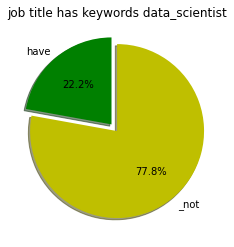

In [ ]:
#call func
draw_pie_chart("has_data_scientist")

### Explain Pie-chart
about 22% of job titles have data_scientist keyword.

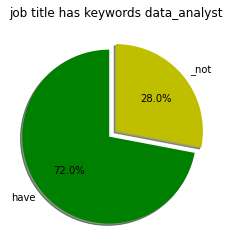

In [ ]:
#call func
draw_pie_chart("has_data_analyst")

### Explain Pie-chart
about 28% (rounded up) of job titles have data_analyst keyword.

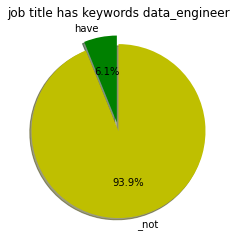

In [ ]:
#call func
draw_pie_chart("has_data_engineer")

### Explain Pie-chart
only 6% (rounded down) of job titles have data_engineer keyword.

In [ ]:
df_merged_clean = df_merged_clean_all.copy()

[Text(0, 0, '0'), Text(0, 0, '1')]

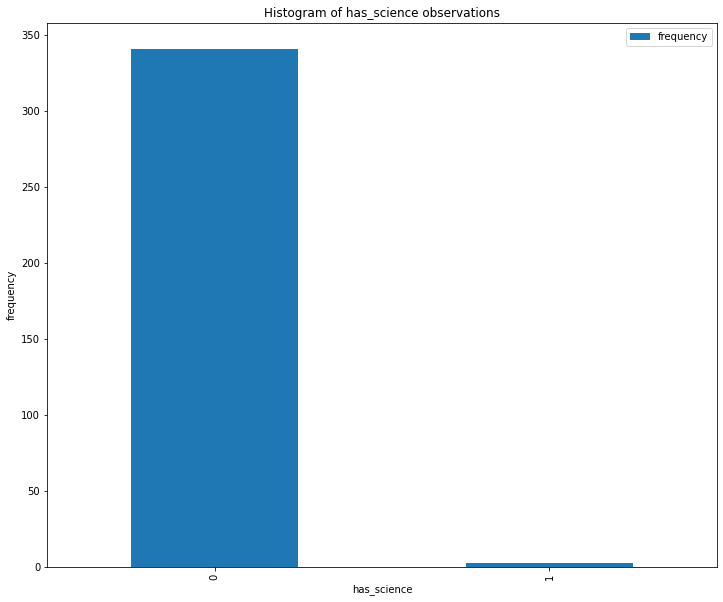

In [ ]:
df_title_category = pd.DataFrame(df_merged_clean.has_science.value_counts(dropna=False) )
df_title_category.rename(columns={"has_science":"frequency"}, inplace=True)
df_title_category.reset_index(inplace=True, drop=False) 
df_title_category.rename(columns={"index":"has_science"}, inplace=True)

df_title_category.plot(figsize=(12,10),kind='bar', 
                  x='has_science', 
                  y='frequency', 
                  ylabel="frequency",
                  title="Histogram of has_science observations")\
          .set_xticklabels(rotation=90,labels=df_title_category['has_science'])

### Explain histogram, has_science
majority of the job title do NOT contain keyword "science"

[Text(0, 0, '1'), Text(0, 0, '0')]

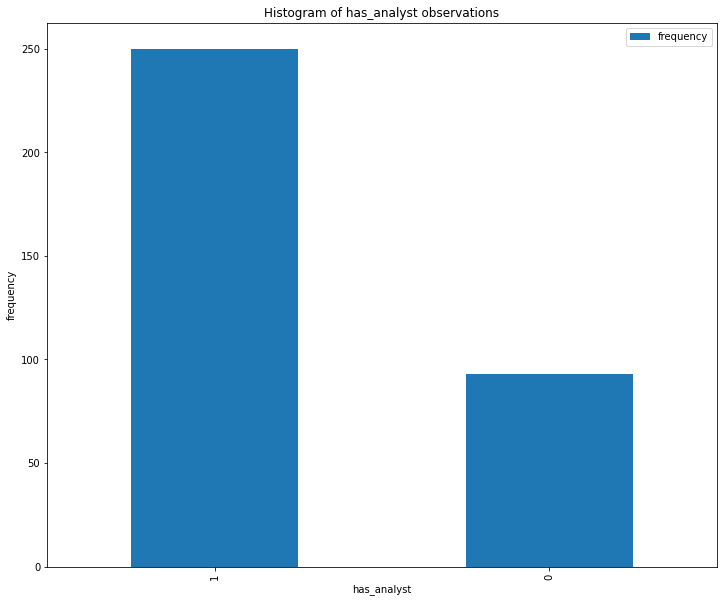

In [ ]:
df_title_category = pd.DataFrame(df_merged_clean.has_analyst.value_counts(dropna=False) )
df_title_category.rename(columns={"has_analyst":"frequency"}, inplace=True)
df_title_category.reset_index(inplace=True, drop=False) 
df_title_category.rename(columns={"index":"has_analyst"}, inplace=True)

df_title_category.plot(figsize=(12,10),kind='bar', 
                  x='has_analyst', 
                  y='frequency', 
                  ylabel="frequency",
                  title="Histogram of has_analyst observations")\
          .set_xticklabels(rotation=90,labels=df_title_category['has_analyst'])

### Explain histogram, has_analyst
majority of the job title do NOT contain keyword "analyst"

[Text(0, 0, '0'), Text(0, 0, '1')]

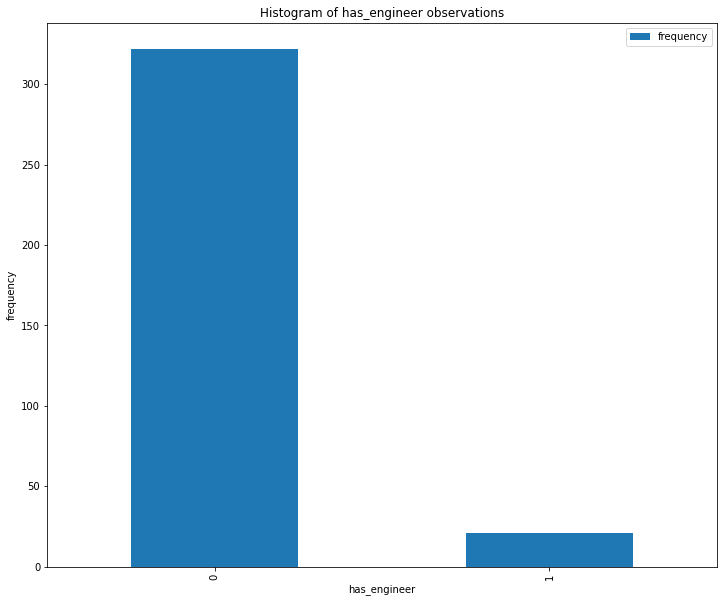

In [ ]:
df_title_category = pd.DataFrame(df_merged_clean.has_engineer.value_counts(dropna=False) )
df_title_category.rename(columns={"has_engineer":"frequency"}, inplace=True)
df_title_category.reset_index(inplace=True, drop=False) 
df_title_category.rename(columns={"index":"has_engineer"}, inplace=True)

df_title_category.plot(figsize=(12,10),kind='bar', 
                  x='has_engineer', 
                  y='frequency', 
                  ylabel="frequency",
                  title="Histogram of has_engineer observations")\
          .set_xticklabels(rotation=90,labels=df_title_category['has_engineer'])

### Explain histogram, has_engineer
majority of the job title do NOT contain keyword "engineer"

Use (df_merged)

In [ ]:
has_job_keywords_col_names = ['has_data_analyst','has_data_scientist','has_data_engineer']
col_sums_1 = df_merged[has_job_keywords_col_names].sum()
col_sums_2 = col_sums_1.sum()
a = int( round( 100*( col_sums_2 / len(df_merged['title_clean'])),2))
print("only {}% jobtitles have either of these keywords 'data_analyst','data_scientist','data_engineer'.".format(a))

only 38% jobtitles have either of these keywords 'data_analyst','data_scientist','data_engineer'.


In [ ]:
b=  round( 100*( col_sums_1 / len(df_merged['title_clean'])),0)
#print (b)

print("only {}% jobtitles have keyword 'data_analyst'.".format( int( b[0] ) ) )
print("only {}% jobtitles have keyword 'data_scientist'.".format( int( b[1] ) ) )
print("only {}% jobtitles have keyword 'data_engineer'.".format( int( b[2] ) ) )

only 28% jobtitles have keyword 'data_analyst'.
only 8% jobtitles have keyword 'data_scientist'.
only 2% jobtitles have keyword 'data_engineer'.


# Correlations

In [ ]:
df_clean_location_salary.columns

Index(['title', 'company', 'description', 'sal_min_yearly', 'sal_max_yearly',
       'state_short_clean', 'city_clean', 'has_science', 'has_scientist',
       'has_analyst', 'has_engineer', 'has_senior', 'has_director',
       'has_analytics', 'has_data_science', 'has_data_scientist',
       'has_data_analyst', 'has_data_engineer', 'title_clean'],
      dtype='object')

In [ ]:
df_clean_location_salary['title'].value_counts()

senior statistical programmer (sr. associate)    209
research assistant/data analyst                  209
healthcare analyst/statistical programmer        209
data scientist                                    35
data engineer                                     12
                                                ... 
business and reporting analyst                     1
senior data science research analyst               1
analytics associate                                1
deep learning engineer (contract)                  1
reporting and data science analyst                 1
Name: title, Length: 197, dtype: int64

In [ ]:
df_merged_clean_subset = df_clean_location_salary[['sal_max_yearly', 'sal_min_yearly',
                                          'has_scientist', 'has_analyst', 'has_engineer',
                                          'has_data_scientist', 'has_data_analyst','has_data_engineer']]

corr_2 = df_merged_clean_subset.corr() # get correlation object
corr_2

,sal_max_yearly,sal_min_yearly,has_scientist,has_analyst,has_engineer,has_data_scientist,has_data_analyst,has_data_engineer
sal_max_yearly,1.000000,0.745437,0.117673,-0.192796,0.147480,0.119482,-0.381634,0.080821
sal_min_yearly,0.745437,1.000000,0.183439,-0.203836,0.189579,0.180122,-0.510440,0.130853
has_scientist,0.117673,0.183439,1.000000,-0.309032,-0.052876,0.972305,-0.183877,-0.022526
has_analyst,-0.192796,-0.203836,-0.309032,1.000000,-0.247082,-0.306898,0.565867,-0.168443
has_engineer,0.147480,0.189579,-0.052876,-0.247082,1.000000,-0.050485,-0.139816,0.681730
has_data_scientist,0.119482,0.180122,0.972305,-0.306898,-0.050485,1.000000,-0.187296,-0.020578
has_data_analyst,-0.381634,-0.510440,-0.183877,0.565867,-0.139816,-0.187296,1.000000,-0.095316
has_data_engineer,0.080821,0.130853,-0.022526,-0.168443,0.681730,-0.020578,-0.095316,1.000000


## salary, job title keywords


* Maximum yearly salary is positively correlated with titles that have "data_engineer" keyword. 

In [ ]:
df_merged_clean_subset = df_clean_location_salary[['sal_max_yearly', 'sal_min_yearly',
                                          'has_senior', 'has_director']]

corr_3 = df_merged_clean_subset.corr() # get correlation object
corr_3

,sal_max_yearly,sal_min_yearly,has_senior,has_director
sal_max_yearly,1.000000,0.745437,0.049040,0.256919
sal_min_yearly,0.745437,1.000000,-0.043514,0.248152
has_senior,0.049040,-0.043514,1.000000,-0.056283
has_director,0.256919,0.248152,-0.056283,1.000000


## salary, job seniority keywords


* Maximum yearly salary is very highly (in this context) correlated with titles that have "Director" keyword.


In [ ]:
df_merged_clean_subset = df_clean_location_salary[['sal_max_yearly', 'sal_min_yearly',
                                          'has_science', 'has_scientist', 
                                          'has_analytics',
                                          'has_data_science']]

corr_4 = df_merged_clean_subset.corr() # get correlation object
corr_4

,sal_max_yearly,sal_min_yearly,has_science,has_scientist,has_analytics,has_data_science
sal_max_yearly,1.000000,0.745437,0.201088,0.117673,0.090895,0.184116
sal_min_yearly,0.745437,1.000000,0.206973,0.183439,0.170054,0.180161
has_science,0.201088,0.206973,1.000000,-0.039028,0.177870,0.967130
has_scientist,0.117673,0.183439,-0.039028,1.000000,-0.005175,-0.058139
has_analytics,0.090895,0.170054,0.177870,-0.005175,1.000000,0.184994
has_data_science,0.184116,0.180161,0.967130,-0.058139,0.184994,1.000000


* Maximum yearly salary is positively correlated with titles that have "science" keyword. 

[Text(0.5, 0, 'sal_max_yearly'),
 Text(1.5, 0, 'sal_min_yearly'),
 Text(2.5, 0, 'has_science'),
 Text(3.5, 0, 'has_scientist'),
 Text(4.5, 0, 'has_analyst'),
 Text(5.5, 0, 'has_engineer'),
 Text(6.5, 0, 'has_senior'),
 Text(7.5, 0, 'has_director'),
 Text(8.5, 0, 'has_analytics'),
 Text(9.5, 0, 'has_data_science'),
 Text(10.5, 0, 'has_data_scientist'),
 Text(11.5, 0, 'has_data_analyst'),
 Text(12.5, 0, 'has_data_engineer')]

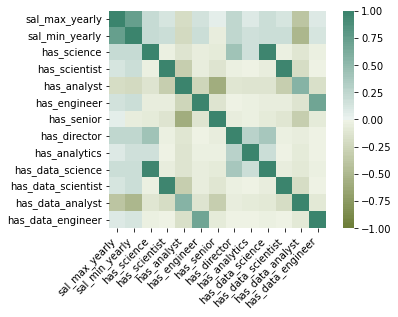

In [ ]:
df_merged_clean_subset = df_clean_location_salary[['sal_max_yearly', 'sal_min_yearly',
                                          'has_science', 'has_scientist', 
                                          'has_analyst','has_engineer', 
                                          'has_senior', 'has_director', 
                                          'has_analytics', 'has_data_science', 
                                          'has_data_scientist', 'has_data_analyst',
                                          'has_data_engineer']]

corr_5 = df_merged_clean_subset.corr() # get correlation object

ax = sns.heatmap( corr_5, 
                  vmin=-1, vmax=1, center=0,
                  cmap=sns.diverging_palette(100, 520, n=100),
                  square=True
                )

ax.set_xticklabels(
                    ax.get_xticklabels(),
                    rotation=45,
                    horizontalalignment='right'
                  )

### Explain Heatmap
* Maximum yearly salary shows negative correlation with job titles with keywords "analyst" and "data_analyst". 
* Maximum yearly salary shows positive correlation with job titles with keywords "data_engineer"

In [ ]:
print(corr_5)

                    sal_max_yearly  ...  has_data_engineer
sal_max_yearly            1.000000  ...           0.080821
sal_min_yearly            0.745437  ...           0.130853
has_science               0.201088  ...          -0.029746
has_scientist             0.117673  ...          -0.022526
has_analyst              -0.192796  ...          -0.168443
has_engineer              0.147480  ...           0.681730
has_senior                0.049040  ...          -0.075074
has_director              0.256919  ...          -0.014671
has_analytics             0.090895  ...          -0.018755
has_data_science          0.184116  ...          -0.028768
has_data_scientist        0.119482  ...          -0.020578
has_data_analyst         -0.381634  ...          -0.095316
has_data_engineer         0.080821  ...           1.000000

[13 rows x 13 columns]


In [ ]:
#df_clean_location_salary['state_short_clean'].value_counts()

In [ ]:
# create filtered df for grouping
df_merged_clean_subset = df_clean_location_salary[['sal_max_yearly', 'sal_min_yearly','state_short_clean']]

df_merged_clean_subset = df_merged_clean_subset [ df_merged_clean_subset['state_short_clean']!= "un" ]

#df_merged_clean_subset['state_short_clean'].value_counts()[0:30]

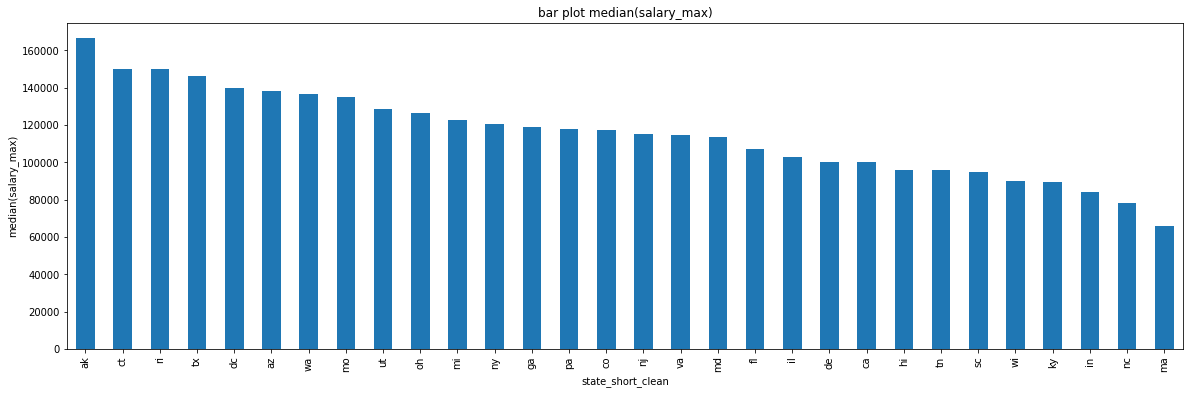

In [ ]:
# get median salary_max data by city
groupby_column_name = "state_short_clean"
median_df_grouped_salary_max = pd.DataFrame(df_merged_clean_subset.groupby(groupby_column_name)['sal_max_yearly'].agg('median'))
# sort values of median(salary_max), descending order
median_df_grouped_salary_max.sort_values(by='sal_max_yearly',ascending=False,inplace=True)
median_df_grouped_salary_max.reset_index(inplace=True, drop=False)
#plot
plt.figure(figsize=(20, 6))

f = median_df_grouped_salary_max['sal_max_yearly'].plot( 
        kind='bar', 
        title="bar plot median(salary_max)", 
        xlabel= groupby_column_name)

f.set_xticklabels(rotation= 90,
                   labels= median_df_grouped_salary_max[groupby_column_name])
plt.ylabel('median(salary_max)')

display(f)


### Explain bar chart
* Highest median salary (considering maximum yearly salary) was on offer for State of (ak) Arkansas, and NOT California.
* Highest median salary (considering maximum yearly salary) was on offer for State of (ma) Massachusetts
* Generally speaking, median salaries are fairly high in most states.